<a href="https://colab.research.google.com/github/Hamza-t/7-Days-of-Exploratory-Data-Analysis/blob/main/Seven_Day_Shoes_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Men_Women_Shoes_Reviews

##Context
Random Night I was going to buy shoes.
After Sometime..
( In my head )
Knock knock : Who's this ?
Stranger : Random Thought
Me : What do you want ?
Stranger : Let's get people's reviews, and analyze what they think ?
Me : Why?
Stranger : …
Me : Ahh.. Okay !! Let's do it ..

##Content
Column contains -
Title, Price, Rating, Product Description, Shoe Type

Rating - Total rating ( out of 5 ).

Total Reviews - Number of reviews that mobile got on that Product

Reviews - Contains up to 10 reviews of Shoe ( separated by '|| ')

Reviews Rating - Contains up to 10 corresponding reviews rating of Mobile ( separated by '|| ')

##Acknowledgements
My sincere thanks to Amazon for making this data possible.

##Inspiration
With this Data, we can draw multiple inferences with word-cloud formation, topic modeling, sentiment analysis, and many more…

####+ :: We can find Potholes in the Product, why people are rating shoes as a bad shoe.

##Importing Liabraries

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
#for importing data(kaggle)
import os
import opendatasets as od

#for stats and data cleaning
import pandas as pd
import numpy as np

#for text processing 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from collections import Counter
# Set of stopwords to remove
stop = set(stop)

#for reviews polarity 
from textblob import TextBlob

# Set of punctuation signs to remove
from string import punctuation

#for data viz 
import seaborn as sns 
import matplotlib.pyplot as plt
import opendatasets as od
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline 
sns.set(color_codes=True)

import plotly.graph_objs as go
from plotly.offline import iplot

# filter warning output
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Display all columns
pd.set_option("display.max_columns", None)

##Text Preparation 
Load the file using Pandas .
*   Load the file using Pandas .
*   Look at some information about the data & the columns
*  Fix any missing or incorrect values

In [ ]:
#Connect with Kagle !
path="https://www.kaggle.com/daishinkan002/men-women-shoes-reviews"
od.download(path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hamzarouaissi
Your Kaggle Key: ··········


100%|██████████| 262k/262k [00:00<00:00, 2.26MB/s]

In [ ]:
path_c= "./men-women-shoes-reviews"
os.listdir(path_c)

['Shoes_Data.csv']

In [ ]:
# Read the file 
data=pd.read_csv(path_c+"/Shoes_Data.csv")
data.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


In [ ]:
#Size and info of data
print(f"The size of data is {data.shape}")
print(30*"-")
print("the type of data")
data.dtypes

The size of data is (1230, 8)
------------------------------
the type of data


title                  object
price                  object
rating                 object
total_reviews          object
product_description    object
reviews                object
reviews_rating         object
Shoe Type              object
dtype: object

##Text Cleaning





In [ ]:
data.describe()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
count,1230,1230,1230,1230,1230,1230,1230,1230
unique,902,627,30,513,730,951,833,2
top,Flavia Women Running Shoes,₹499.00,4.1 out of 5 stars,25 ratings,The product will be an excellent pick for you....,Verified Purchase,5.0 out of 5 stars,Men
freq,13,31,178,22,29,11,41,856


In [ ]:
# Missing values 
print(data.isnull().sum())

title                  0
price                  0
rating                 0
total_reviews          0
product_description    0
reviews                0
reviews_rating         0
Shoe Type              0
dtype: int64


In [ ]:
# Missing values 
print(data.isnull().sum())

title                  0
price                  0
rating                 0
total_reviews          0
product_description    0
reviews                0
reviews_rating         0
Shoe Type              0
dtype: int64


In [ ]:
#remove duplicate rows 
print(data.duplicated().sum())
data[data.duplicated()]
data=data.drop_duplicates().reset_index()
data

215


,index,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...,...
1010,1193,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1011,1194,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1012,1195,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1013,1196,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


In [ ]:
# Text cleaning 
df=data[['reviews','reviews_rating']]

 #reviews and ratings are separated by "||", so row 1 row contains a number of reviews. To analyse them, we need to make "1 row - 1 review" format.
rew  = []
rat = []

for j in df.index:
    lst = [i for i in df.iloc[j].reviews.split('||')]
    for k in lst:
        rew.append(k)
        
for j in df.index:
    lst = [i for i in df.iloc[j].reviews_rating.split('||')]
    for k in lst:
        rat.append(k)
        
df = pd.DataFrame(list(zip(rew, rat)),
               columns =['Review', 'Review_rating'])

In [ ]:
df.head()

,Review,Review_rating
0,Not happy with product,1.0 out of 5 stars
1,It's not as expected.,1.0 out of 5 stars
2,AVERAGE PRODUCT,3.0 out of 5 stars
3,Pic more beautiful,3.0 out of 5 stars
4,Got damage product. But quality is average fo...,3.0 out of 5 stars


In [ ]:
# Getting all unique symbols in text
all_text = str()
for sentence in df['Review'].values:
    all_text += sentence
    
''.join(set(all_text))

df_copy= df.copy()

In [ ]:
# so we have much to clean ! 

def lower(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punctuation))

#remove stop word like : is ,as ,it ...
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

# Removing all words with digits and standalone digits
def remove_digits(text):
    return re.sub(r'\d+', '', text)

#remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing all non-printable symbols like "ड", "ட"
def remove_non_printable(text):
    text = text.encode("ascii", "ignore")
    return text.decode()
#theris an element in stop that change the full expression , so we keep the reviews columns       
# One function to clean it all
def clean_text(text):
    text = lower(text)
    text = remove_punctuation(text)
    text = remove_digits(text)
    text = remove_emoji(text)
    text = remove_non_printable(text)
    return text

In [ ]:
# apply to dataframe
df['Review']=df['Review'].apply(clean_text)

In [ ]:
df.head()

,Review,Review_rating
0,not happy with product,1.0 out of 5 stars
1,its not as expected,1.0 out of 5 stars
2,average product,3.0 out of 5 stars
3,pic more beautiful,3.0 out of 5 stars
4,got damage product but quality is average for,3.0 out of 5 stars


In [ ]:
#we only need one digit in "Review_rating" column, not a full string.

# Returns first digit entry in a string
def get_first_digit(text):
    match = re.search(r'\d', text)
    return match[0]

In [ ]:
df['Review_rating']=df['Review_rating'].apply(get_first_digit)

In [ ]:
df.head()

,Review,Review_rating
0,not happy with product,1
1,its not as expected,1
2,average product,3
3,pic more beautiful,3
4,got damage product but quality is average for,3


In [ ]:
pip install emoji

     |████████████████████████████████| 168 kB 7.0 MB/s 
  Created wheel for emoji: filename=emoji-1.6.0-py3-none-any.whl size=168256 sha256=c3bf6cb169237f3c64d2c79ffeb840a64b0e4a6956123cc804122df226ce9549
  Stored in directory: /root/.cache/pip/wheels/f7/d7/74/c720aaf345a042b0c2d74361873258c5e8649b7f11b2ccce49
Successfully built emoji


In [ ]:
# another way of cleaning and explore the emoticons and stop words
# emoticons
def load_dict_smileys():
    
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

# self defined contractions
def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }


import itertools
import emoji
import sys
import os

def text_cleaning_for_sentiment_analysis(text):    
    
    
    #Special case not handled previously.
    text = text.replace('\x92',"'")
    
    #Removal of hastags/account
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", text).split())
    
    #Removal of address
    text = ' '.join(re.sub("(\w+:\/\/\S+)", " ", text).split())
    
    #Removal of Punctuation
    text = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", text).split())
    
    #Lower case
    text = text.lower()
    
    #CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    CONTRACTIONS = load_dict_contractions()
    text = text.replace("’","'")
    words = text.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    text = " ".join(reformed)
    
    #remove stopwords 
    #remove_stopwords(text)


    # Standardizing words
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    
    #Deal with emoticons source: https://en.wikipedia.org/wiki/List_of_emoticons
    SMILEY = load_dict_smileys()  
    words = text.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    text = " ".join(reformed)
    
    #Deal with emojis
    text = emoji.demojize(text)

    text = text.replace(":"," ")
    text = ' '.join(text.split())

    return text


In [ ]:
df_copy['Review'] = df_copy['Review'].apply(text_cleaning_for_sentiment_analysis)
df_copy['Review_rating']=df_copy['Review_rating'].apply(get_first_digit)

In [ ]:
df_copy.head()

,Review,Review_rating
0,not happy with product,1
1,it is not as expected,1
2,average product,3
3,pic more beautiful,3
4,got damage product but quality is average for ...,3


In [ ]:
#well , we will work with df_copy xD ! 
#we will make some analysis : wordcloud, EDA, and sentiment analysis

In [ ]:
df=df_copy

In [ ]:
df['Review'].value_counts()

verified purchase                                                                                     429
good                                                                                                  256
report abuse                                                                                          199
good product                                                                                          144
nice                                                                                                  109
                                                                                                     ... 
the shoes are undoubtedly the best in the price range                                                   1
size correct size so i'm happy this product                                                             1
show quality is pathetic it started to open up day 2 and hush puppies customer care does not exist      1
bata as usual lives up to their reputation    

In [ ]:
# we will drop "verified purchase" and "report abuse"
df = df[~df.Review.str.contains("Report abuse")]
df = df[~df.Review.str.contains("Verified")]

##WordCloud

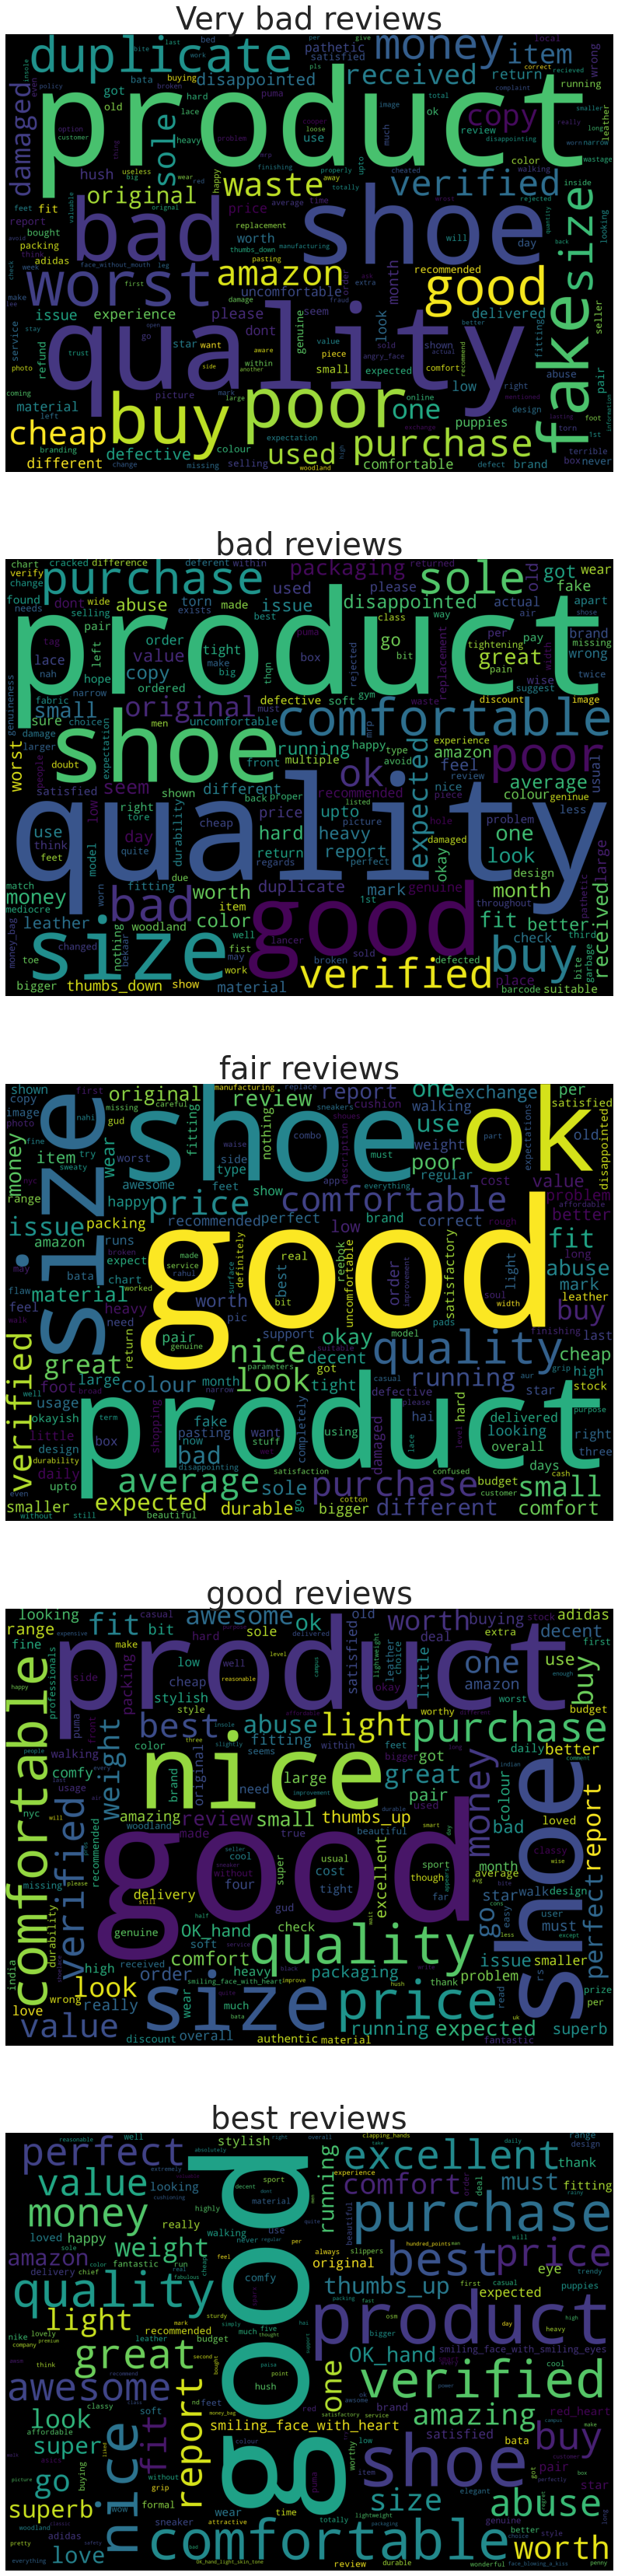

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(100,60))

subset1 = df[df['Review_rating']=='1']
text = subset1.Review.values
cloud1=WordCloud(collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(5, 1, 1)
plt.axis('off')
plt.title("Very bad reviews",fontsize=40)
plt.imshow(cloud1)

subset2 = df[df['Review_rating']=='2']
text = subset2.Review.values
cloud2=WordCloud(collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(5, 1, 2)
plt.axis('off')
plt.title("bad reviews",fontsize=40)
plt.imshow(cloud2)

subset3 = df[df['Review_rating']=='3']
text = subset3.Review.values
cloud3=WordCloud(collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(5, 1, 3)
plt.axis('off')
plt.title("fair reviews",fontsize=40)
plt.imshow(cloud3)

subset4 = df[df['Review_rating']=='4']
text = subset4.Review.values
cloud4=WordCloud(collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(5, 1, 4)
plt.axis('off')
plt.title("good reviews",fontsize=40)
plt.imshow(cloud4)

subset5 = df[df['Review_rating']=='5']
text = subset5.Review.values
cloud5=WordCloud(collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(5, 1, 5)
plt.axis('off')
plt.title("best reviews",fontsize=40)
plt.imshow(cloud5)

## Sentiment Analysis

### What is sentiment analysis?
    Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text
    Some examples of applications for sentiment analysis include:

    1.Analyzing the social media discussion around a certain topic
    2.Evaluating survey responses
    3.Determining whether product reviews are positive or negative

    Sentiment analysis is not perfect.It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze it.For this project,the goal is to to classify Food reviews based on customers' text.

In [ ]:
#add polarity 
polarity=[] # list which will contain the polarity of the comments

for i in df['Review']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)   
    except:
        polarity.append(0)

In [ ]:
df['polarity']=polarity

In [ ]:
df.head()

,Review,Review_rating,polarity
0,not happy with product,1,-0.400
1,it is not as expected,1,-0.100
2,average product,3,-0.150
3,pic more beautiful,3,0.675
4,got damage product but quality is average for ...,3,-0.150


##EDA 

###Comparing rating of the reviews and their sentiment:

In [ ]:
df.head()


,Review,Review_rating,polarity
0,not happy with product,1,-0.400
1,it is not as expected,1,-0.100
2,average product,3,-0.150
3,pic more beautiful,3,0.675
4,got damage product but quality is average for ...,3,-0.150


In [ ]:
sentiment=[]
for i in df.index:
  if df.iloc[i].polarity > 0.3 :
    sentiment.append('pos')
  elif df.iloc[i].polarity <-0.3 :
    sentiment.append('neg')
  else:
    sentiment.append('neu')
df['sentiment']= pd.Series(sentiment)

In [ ]:
df.head()

,Review,Review_rating,polarity,sentiment
0,not happy with product,1,-0.400,neg
1,it is not as expected,1,-0.100,neu
2,average product,3,-0.150,neu
3,pic more beautiful,3,0.675,pos
4,got damage product but quality is average for ...,3,-0.150,neu


<Figure size 1440x864 with 0 Axes>

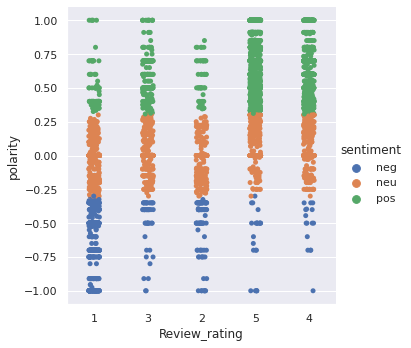

In [ ]:
plt.figure(figsize=(20,12))
sns.catplot(data=df, x='Review_rating', y='polarity',hue='sentiment')

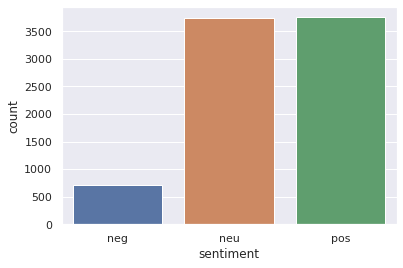

In [ ]:
sns.countplot(data=df, x='sentiment')

###The length and word counts in the reviews.

In [ ]:
#the length and word count of the review 
df['review_len'] = df['Review'].astype(str).apply(len)
df['review_word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [ ]:
one = df[df['Review_rating']=='1']
two = df[df['Review_rating']=='2']
three = df[df['Review_rating']=='3']
four = df[df['Review_rating']=='4']
five = df[df['Review_rating']=='5']

In [ ]:
trace0 = go.Box(
    y=one['review_len'],
    name = 'One star',
    marker = dict(
        color = 'red',
    )
)

trace1 = go.Box(
    y=two['review_len'],
    name = 'Two stars',
    marker = dict(
        color = 'green',
    )
)

trace2 = go.Box(
    y=three['review_len'],
    name = 'Three stars',
    marker = dict(
        color = 'orange',
    )
)

trace3 = go.Box(
    y=four['review_len'],
    name = 'Four stars',
    marker = dict(
        color = 'blue',
    )
)

trace4 = go.Box(
    y=five['review_len'],
    name = 'Five stars',
    marker = dict(
        color = 'purple',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Length of the reviews", title_x=0.5,
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)


In [ ]:
trace0 = go.Box(
    y=one['review_word_count'],
    name = 'One star',
    marker = dict(
        color = 'red',
    )
)

trace1 = go.Box(
    y=two['review_word_count'],
    name = 'Two stars',
    marker = dict(
        color = 'green',
    )
)

trace2 = go.Box(
    y=three['review_word_count'],
    name = 'Three stars',
    marker = dict(
        color = 'orange',
    )
)

trace3 = go.Box(
    y=four['review_word_count'],
    name = 'Four stars',
    marker = dict(
        color = 'blue',
    )
)

trace4 = go.Box(
    y=five['review_word_count'],
    name = 'Five stars',
    marker = dict(
        color = 'purple',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Word count of the reviews", title_x=0.5,
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

###Unigrams and bigrams in the reviews.

In [ ]:
# w will drop the stop word here
df0=df.copy()
df0['Review'] = df0['Review'].apply(remove_stopwords)
df_pos = df0[df0['sentiment']=='pos']
df_neg = df0[df0['sentiment']=='neg']

pos_word = Counter(" ".join(df_pos["Review"]).split()).most_common(10)
neg_word = Counter(" ".join(df_neg["Review"]).split()).most_common(10)

def split(li):
  list1=[]
  list2=[]
  for i, value in li:
    list1.append(i)
    list2.append(value)
  return  pd.DataFrame(list(zip(list1, list2)),
               columns =['word', 'frequency'])

In [ ]:
pos_word_df = split(pos_word)
neg_word_df = split(neg_word)

In [ ]:
px.bar(pos_word_df, x="frequency", y="word", orientation='h',title='Top 10 Unigrams in positive text')

In [ ]:
px.bar(neg_word_df, x="frequency", y="word", orientation='h',title='Top 10 Unigrams in negative text')